1\. Скачайте из папки с домашними заданиями английский текст первой книги о Гарри Поттере. Он должен быть сохранен отдельным файлом

2\.1\. Очистите текст от пунктуации, приведите его к нижнему регистру, лемматизируйте и запишите в новый файл.

In [16]:
# Импортирую модули
import re 
import spacy
# Подгружаю английский для спейси
nlp = spacy.load('en')

# Открываю файл для чтения и для записи
with open("Harry_Potter_and_the_Sorcerers_Stone.txt", "r+", encoding="utf-8") as f, open("result.txt", "w+", encoding="utf-8") as g:
    povar = f.read()
    # Очищаю от лишней пунктуации и делаю один низкий регистр
    h1 = re.sub('[\'!\"#$%&()*+,-./:;<=>?@[\]^_`{|}~„“«»†*—/\-"]', '', povar)
    h2 = h1.lower()
    h3 = nlp(h2)
    # Лемматизирую 
    lemmas = [token.lemma_ for token in h3 if not token.is_stop]
    for lemm in lemmas:
        # Записываю в новый файл
        g.write("%s\n" % lemm)

2\.2\. Проверьте, выполняется ли здесь закон Ципфа. Для этого постройте линейную диаграмму, где по оси Х будет ранг (порядковый номер) слова в отсортированном по убыванию частотном словаре, а по оси Y - относительная частота (абсолютная частота, разделенная на количество слов в тексте). Т.е. у самого частотного слова будет ранг 1, у второго по частоте -- 2 и т.д.

In [17]:
# Импортирую модули
import re
from operator import itemgetter
from collections import Counter

# Это нам понадобится для подсчета слов чуть позже
frequency = {}

# Открываю файл и высчитываю в нем все слова при помощи регулярных выражений
open_file = open('result.txt', 'r')
file_to_string = open_file.read()
words = re.findall(r'(\b[A-Za-z][a-z]{2,20}\b)', file_to_string)
 
# Сюда будут записываться значения для построения линейной диаграммы    
os_x = {} # Для слов и их порядковых номеров (рангов)
os_y = {} # Для относительной частоты

# При помощи этого простенького цикла подсчитываю количество слов
for word in words:
    count = frequency.get(word,0)
    frequency[word] = count + 1

# При помощи этого цикла я по убыванию записываю в словарь слова     
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    if key in os_x:
        pass
    else:
        os_x[key] = 0
        
# А с помощью этого - присваиваю к каждому порядковый номер
os_x = {key: rank for rank, key in enumerate(sorted(os_x, key=os_x.get), 1)}

# Тут я, повторяя конструкцию из прошлого домашнего задания, высчитываю относительную частоту
for key, value in reversed(sorted(frequency.items(), key = itemgetter(1))):
    otn = value/len(words)
    os_y[key] = otn

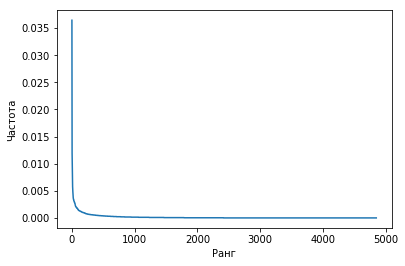

In [18]:
# Импорт модулей для построения диаграммы
import matplotlib
import matplotlib.pyplot as plt

# Присуждаю осям X и Y значения из предыдущего блока
plt.plot(list(os_x.values()), list(os_y.values()))
# Называю их во избежание путаницы
plt.xlabel("Ранг")
plt.ylabel("Частота")
# Вывожу результат на экран
plt.show()

3\. Очистите текст от стоп-слов. Постройте barplot для 30 самых частотных слов. Эти слова должны быть по оси Х в виде подписей к делениям. Значениями по этой оси будет ряд чисел от 0 до 30.

In [19]:
# Сначала перевожу в словарь список подсчитанных слов
chast = dict(Counter(words))

# Теперь сортирую их в обратном порядке
chast_sorted = (dict(sorted(chast.items(), key=lambda x: x[1], reverse=True)))

# Делаю список со словами для оси X
slova = list(chast_sorted.keys()) 

# Делаю список со частотностью употребления для оси Y 
kakchasto = list(chast_sorted.values())

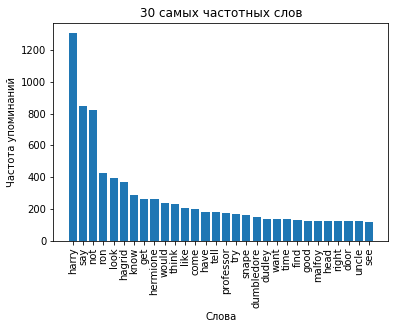

In [20]:
# Помечаю, что нужны только первые 30 значений из списков
X = [i for i in range(0,30)] 
Y = kakchasto[:30] 

# Даю команду
plt.bar(X, Y)

# Делаю разворот, чтобы было красиво
plt.xticks(X, slova, rotation=90)

# Даю названия
plt.title("30 самых частотных слов")
plt.xlabel("Слова")
plt.ylabel("Частота упоминаний")

# Вывожу на экран
plt.show()